#### Universidade de Brasília <br> Departamento de Ciência da Computação
# Projeto 1:
### Teoria e Aplicação de Grafos, Turma 01, 2025/1 <br> Prof. Díbio <br> Integrantes do Grupo: Bruno Henrique (), João Victor Prata (202028857), Manuela ()

## Importar Bibliotecas:

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

## Coletar Dados:

In [9]:
#...
# Load dataset (example format: user1, user2, weight)
df = pd.read_csv('twitter_network.csv')
display(df)

,user1,user2,weight
0,alice,bob,2
1,bob,charlie,1
2,charlie,alice,3
3,dave,alice,1
4,bob,alice,1
5,alice,charlie,2
6,charlie,bob,1
7,eve,alice,1
8,dave,charlie,2


## Construir Grafo:

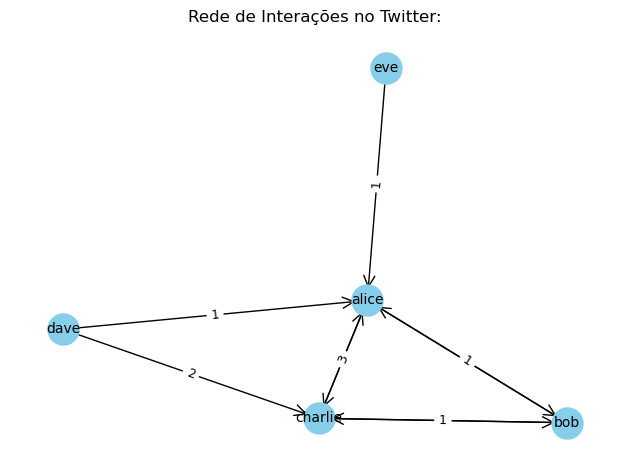

In [26]:
# Criar grafo direcionado:
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['user1'], row['user2'], weight=row['weight'])

# Calcular PageRank:
pagerank = nx.pagerank(G, alpha=0.85)

# Detectar comunidades:
communities = greedy_modularity_communities(G)

# Layout dos nós:
pos = nx.spring_layout(G, seed=42)

# Desenhar os nós com tamanho proporcional ao PageRank:
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

# Desenhar as arestas:
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

# Desenhar os rótulos dos nós (nomes dos usuários):
nx.draw_networkx_labels(G, pos, font_size=10)

# Desenhar os pesos das arestas:
edge_weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=9)

# Exibir o grafo:
plt.title("Rede de Interações no Twitter:")
plt.axis('off')
plt.tight_layout()
plt.show()